<a href="https://colab.research.google.com/github/pipe-felipe/tcc_knn/blob/main/tcc_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

In [46]:
from mlxtend.plotting import plot_decision_regions

In [47]:
from google.colab import drive
import pandas

In [48]:
drive.mount('/content/drive')

data_customer_path = "/content/drive/MyDrive/TG/KNN"
customers = "customer.csv"
data_set = f"{data_customer_path}/{customers}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv(data_set)
df.drop(['_id', '_class'], 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [103]:
df.tail()

,name,email,document,creditCard.flag,creditCard.holderName,creditCard.number,creditCard.validThru,creditCard.cvv,address.street,address.number,address.city,address.state,address.country,address.zipCode,age,transactionValue,transactionCount,transactionStatus,transactionMessage
1172,Berneice82 Furtado,Berneice82 Furtado_tcc@yahoo.com,83812125889,VISA,Berneice82 Furtado,76804693,2027-20,6709,Dejah Springs,427,West Dasiafurt,Sao Paulo,Brazil,59901,25,541.72,1,REPROVE,Second name 'Furtado' is not allowed
1173,Patrick68 Furtado,Patrick68 Furtado_tcc@yahoo.com,78104544047,VISA,Patrick68 Furtado,16844702,2027-20,6106,Harris Plains,53,East Jensen,Sao Paulo,Brazil,42676,29,1079.04,1,REPROVE,Second name 'Furtado' is not allowed
1174,Delbert81 Furtado,Delbert81 Furtado_tcc@gmail.com,76085337221,VISA,Delbert81 Furtado,67362769,2027-20,9218,Golden Manor,872,West Covina,Sao Paulo,Brazil,515308,30,419.09,1,REPROVE,Second name 'Furtado' is not allowed
1175,Dell40 Furtado,Dell40 Furtado_tcc@hotmail.com,11811444180,VISA,Dell40 Furtado,98701213,2027-20,9071,Mavis Hill,103,North Jennyfertown,Sao Paulo,Brazil,270344,23,470.50,1,REPROVE,Second name 'Furtado' is not allowed
1176,Zaria.Gerhold50 Furtado,Zaria.Gerhold50 Furtado_tcc@yahoo.com,76632051979,VISA,Zaria.Gerhold50 Furtado,63739556,2027-20,9860,Kohler Pike,903,Lake Brycenhaven,Sao Paulo,Brazil,172434,25,1039.94,1,REPROVE,Second name 'Furtado' is not allowed


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1177 non-null   object 
 1   email                  1177 non-null   object 
 2   document               1177 non-null   int64  
 3   creditCard.flag        1177 non-null   object 
 4   creditCard.holderName  1177 non-null   object 
 5   creditCard.number      1177 non-null   int64  
 6   creditCard.validThru   1177 non-null   object 
 7   creditCard.cvv         1177 non-null   int64  
 8   address.street         1177 non-null   object 
 9   address.number         1177 non-null   int64  
 10  address.city           1177 non-null   object 
 11  address.state          1177 non-null   object 
 12  address.country        1177 non-null   object 
 13  address.zipCode        1177 non-null   int64  
 14  age                    1177 non-null   int64  
 15  tran

In [105]:
df.describe()

,document,creditCard.number,creditCard.cvv,address.number,address.zipCode,age,transactionValue,transactionCount
count,1.177000e+03,1.177000e+03,1177.000000,1177.000000,1.177000e+03,1177.000000,1177.000000,1177.0
mean,4.889961e+10,4.914856e+07,4902.916737,494.657604,4.640198e+05,27.394223,681.022107,1.0
std,2.609057e+10,2.880495e+07,2867.903909,289.754208,3.014790e+05,2.951576,386.609889,0.0
min,2.415585e+07,9.562000e+03,10.000000,0.000000,1.690000e+02,22.000000,1.220000,1.0
25%,2.723375e+10,2.435099e+07,2361.000000,236.000000,1.863220e+05,25.000000,355.070000,1.0
50%,4.751814e+10,4.901266e+07,4850.000000,495.000000,4.609150e+05,27.000000,680.690000,1.0
75%,7.168596e+10,7.394942e+07,7311.000000,744.000000,7.176260e+05,30.000000,1021.020000,1.0
max,9.956247e+10,9.983998e+07,9976.000000,1000.000000,1.000710e+06,32.000000,1341.360000,1.0


In [53]:
df.describe(include=['object'])

,name,email,creditCard.flag,creditCard.holderName,creditCard.validThru,address.street,address.city,address.state,address.country,transactionStatus,transactionMessage
count,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,214
unique,1177,1177,1,1177,1,1177,1142,1,1,2,1
top,Lavada90,Lavada90_1665435381143@gmail.com,VISA,Lavada90,2027-20,Satterfield Crest,Providence,Sao Paulo,Brazil,APPROVE,Second name 'Furtado' is not allowed
freq,1,1,1177,1,1177,1,3,1177,1177,963,214


In [54]:
transaction_status_result = {'REPROVE': 1,'APPROVE': 0}
df.transactionStatus = [transaction_status_result[result] for result in df.transactionStatus]
df.tail()

,name,email,document,creditCard.flag,creditCard.holderName,creditCard.number,creditCard.validThru,creditCard.cvv,address.street,address.number,address.city,address.state,address.country,address.zipCode,age,transactionValue,transactionCount,transactionStatus,transactionMessage
1172,Berneice82 Furtado,Berneice82 Furtado_tcc@yahoo.com,83812125889,VISA,Berneice82 Furtado,76804693,2027-20,6709,Dejah Springs,427,West Dasiafurt,Sao Paulo,Brazil,59901,25,541.72,1,1,Second name 'Furtado' is not allowed
1173,Patrick68 Furtado,Patrick68 Furtado_tcc@yahoo.com,78104544047,VISA,Patrick68 Furtado,16844702,2027-20,6106,Harris Plains,53,East Jensen,Sao Paulo,Brazil,42676,29,1079.04,1,1,Second name 'Furtado' is not allowed
1174,Delbert81 Furtado,Delbert81 Furtado_tcc@gmail.com,76085337221,VISA,Delbert81 Furtado,67362769,2027-20,9218,Golden Manor,872,West Covina,Sao Paulo,Brazil,515308,30,419.09,1,1,Second name 'Furtado' is not allowed
1175,Dell40 Furtado,Dell40 Furtado_tcc@hotmail.com,11811444180,VISA,Dell40 Furtado,98701213,2027-20,9071,Mavis Hill,103,North Jennyfertown,Sao Paulo,Brazil,270344,23,470.50,1,1,Second name 'Furtado' is not allowed
1176,Zaria.Gerhold50 Furtado,Zaria.Gerhold50 Furtado_tcc@yahoo.com,76632051979,VISA,Zaria.Gerhold50 Furtado,63739556,2027-20,9860,Kohler Pike,903,Lake Brycenhaven,Sao Paulo,Brazil,172434,25,1039.94,1,1,Second name 'Furtado' is not allowed


In [55]:
df['transactionStatus'].describe()

count    1177.000000
mean        0.181818
std         0.385859
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: transactionStatus, dtype: float64

In [56]:
df['transactionStatus'].unique()

array([0, 1])

In [57]:
df_dummy = pd.get_dummies(df)

In [58]:
df_dummy.head()

,document,creditCard.number,creditCard.cvv,address.number,address.zipCode,age,transactionValue,transactionCount,transactionStatus,name_Aaliyah_Marquardt,...,address.city_Wunschmouth,address.city_Yesseniaside,address.city_York,address.city_Yucaipa,address.city_Zechariahberg,address.city_Zenastad,address.city_Zulachester,address.state_Sao Paulo,address.country_Brazil,transactionMessage_Second name 'Furtado' is not allowed
0,84585663207,75586739,4224,639,498975,24,789.83,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3768039323,71869615,7436,795,423265,28,22.77,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,87712389560,61009217,4321,377,926430,28,1240.38,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,83723152643,77635098,8042,938,51847,23,286.95,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,63856028501,59652516,1159,251,999751,29,15.36,1,0,0,...,0,0,0,0,0,0,0,1,1,0


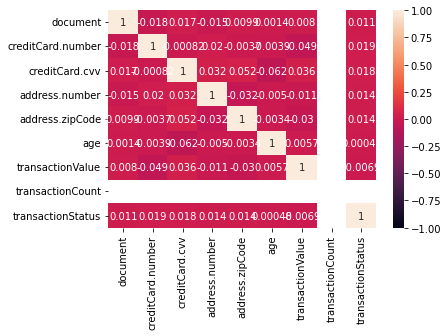

In [81]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Isso quer dizer que a variável transactionCount explica 0.18% a variável transactionStatus

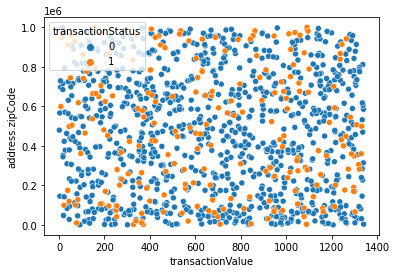

In [85]:
sns.scatterplot(data=df, x='transactionValue', y='address.zipCode', hue='transactionStatus')

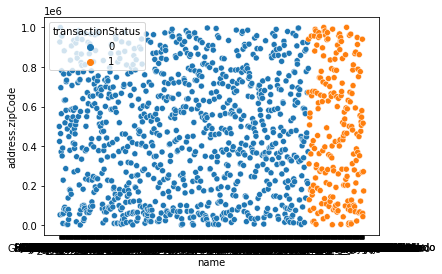

In [86]:
sns.scatterplot(data=df, x='name', y='address.zipCode', hue='transactionStatus')

# Start with KNN

In [61]:
X = np.array(df_dummy.drop(['transactionStatus'], 1))
y = np.array(df_dummy['transactionStatus'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [62]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)

In [63]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [64]:
clf = neighbors.KNeighborsClassifier(n_neighbors=19, metric='euclidean')

In [65]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [89]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7754237288135594


# Vizualizar a fronteira

In [108]:
def knn_comparison(data, k):
  x = data[['transactionMessage_Second name \'Furtado\' is not allowed', 'address.zipCode']].values
  y = data['transactionStatus'].values
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(x, y)
  plot_decision_regions(x, y, clf=knn)
  plt.xlabel('transactionMessage_Second name \'Furtado\' is not allowed')
  plt.ylabel('address.zipCode')
  plt.title('K=' + str(k))
  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


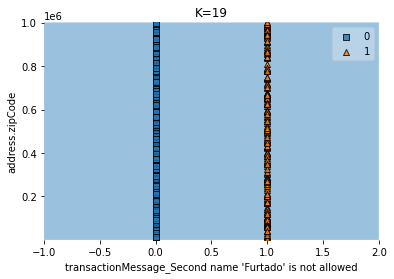

In [110]:
knn_comparison(df_dummy, 19)

In [69]:
df_dummy.head(1).T

,0
document,8.458566e+10
creditCard.number,7.558674e+07
creditCard.cvv,4.224000e+03
address.number,6.390000e+02
address.zipCode,4.989750e+05
...,...
address.city_Zenastad,0.000000e+00
address.city_Zulachester,0.000000e+00
address.state_Sao Paulo,1.000000e+00
address.country_Brazil,1.000000e+00
